In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm

### Rense data (gjort for oss av Ingeborg)

In [ ]:
data_frame = pd.read_csv("lego.population.csv", sep =",", encoding ="latin1")
# fjerner forklaringsvariabler vi ikke trenger
lego_set_data = data_frame[['Set_Name', 'Theme', 'Pieces', 'Price', 'Pages', 'Minifigures', 'Unique_Pieces']]

# fjerner observasjoner med manglende datapunkter
lego_set_data = lego_set_data.dropna()

# gjør themes om til string og fjern alle tegn vi ikke vil ha med
lego_set_data['Theme'] = lego_set_data['Theme'].astype(str)
lego_set_data['Theme'] = lego_set_data['Theme'].str.replace(r'[^a-zA-Z0-9\s-]', '', regex = True)

# fjerner dollartegn og trademark-tegn fra datasettet
lego_set_data['Price'] = lego_set_data['Price'].str.replace('\$', '', regex = True)

# og gjør så prisen om til float
lego_set_data['Price'] = lego_set_data['Price'].astype(float)

lego_set_data

### A. Unike brikker beskrevet av (totalt) antall brikker (Enkel lineær regresjon)

In [ ]:
# enkel lineær regresjon
formel = 'Unique_Pieces ~ Pieces'

model = smf.ols(formel, data = lego_set_data)
result = model.fit()

result.summary()

In [ ]:
slope = result.params['Pieces']
intercept = result.params['Intercept']

regression_x = np.array(lego_set_data['Pieces'])
regression_y = slope * regression_x + intercept

plt.scatter(lego_set_data['Pieces'], lego_set_data['Unique_Pieces'], label='Data Points')
plt.plot(regression_x, regression_y, color='red', label='Regression Line')
plt.xlabel('Antall brikker')
plt.ylabel('Antall unike brikker')
plt.title('Kryssplott med regresjonslinje (enkel LR)')
plt.legend()
plt.grid()
plt.show()

### B. Unike brikker beskrevet av antall brikker og pris (Multippel lineær regresjon)

In [ ]:
# multippel lineær regresjon
modell3_mlr = smf.ols('Unique_Pieces ~ Pieces + Price' , data = lego_set_data)
modell3_mlr.fit().summary()

### C. Unike brikker beskrevet av antall brikker, med egne parametere for hver gruppe (Film/TV-serier, spill, ingen av delene)
### a. Egen modell for hver gruppe (3x Enkel lineær regresjon)

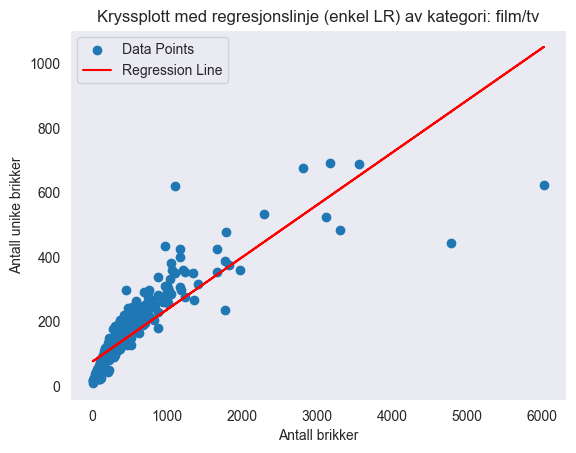

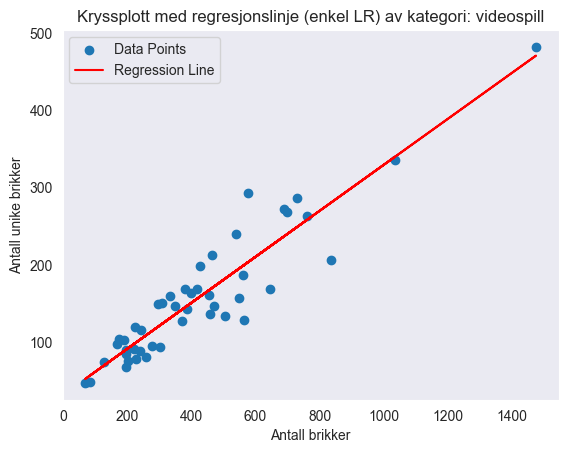

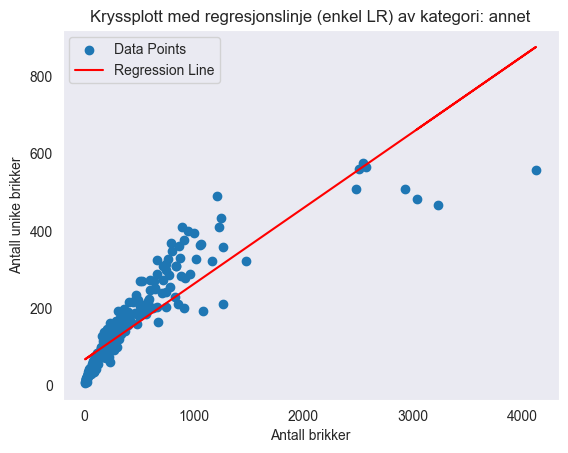

In [63]:
# Groups the themes together and creates corresponding arrays
film_tv_themes = ['NINJAGO', 'Star Wars', 'Batman', 'DC', 'Disney', 'Jurassic World', 'LEGO Frozen 2', 'Marvel', 'Minions', 'Monkie Kid', 'Powerpuff Girls', 'Spider-Man', 'Stranger Things', 'THE LEGO MOVIE 2', 'Trolls World Tour', 'Unikitty', 'Harry Potter']

video_games_themes = ['Hidden Side', 'Minecraft', 'Overwatch']

other_themes = ['City', 'Friends', 'Classic', 'Creator 3-in-1', 'Creator Expert', 'DUPLO', 'Ideas', 'Juniors', 'Minifigures', 'Powered UP', 'Speed Champions']

film_tv = lego_set_data[lego_set_data['Theme'].isin(film_tv_themes)]
video_games = lego_set_data[lego_set_data['Theme'].isin(video_games_themes)]
other = lego_set_data[lego_set_data['Theme'].isin(other_themes)]

for media in [film_tv, video_games, other]:
    kategori = ""
    if media['Theme'].count() == film_tv['Theme'].count():
        kategori = "film/tv"
    elif media['Theme'].count() == video_games['Theme'].count():
        kategori = "videospill"
    elif media['Theme'].count() == other['Theme'].count():
        kategori = "annet"

    model = smf.ols('Unique_Pieces ~ Pieces', data = media)
    result = model.fit()

    slope = result.params['Pieces']
    intercept = result.params['Intercept']

    regression_x = np.array(media['Pieces'])
    regression_y = slope * regression_x + intercept

    plt.scatter(media['Pieces'], media['Unique_Pieces'], label='Data Points')
    plt.plot(regression_x, regression_y, color='red', label='Regression Line')
    plt.xlabel('Antall brikker')
    plt.ylabel('Antall unike brikker')
    plt.title(f"Kryssplott med regresjonslinje (enkel LR) av kategori: {kategori}")
    plt.legend()
    plt.grid()
    plt.show()

### b. Kun eget skjæringspunkt (Multippel lineær regresjon)

In [64]:
# multippel lineær regresjon
modell3_mlr = smf.ols('Price ~ Pieces + Theme' , data = lego_set_data)
modell3_mlr.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     155.5
Date:                Thu, 02 Nov 2023   Prob (F-statistic):          1.82e-285
Time:                        08:46:27   Log-Likelihood:                -3108.1
No. Observations:                 714   AIC:                             6280.
Df Residuals:                     682   BIC:                             6426.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      4.3689      4.860      0.899      0.369      -5.173      13.911
Theme[T.City]                 12.0619      5.208      2.316      0.021       1.835      22.288
Theme[T.Classic]             -18.2671     10.756     -1.698      0.090     -39.385       2.851
Theme[T.Creator 3-in-1]       -4.4112      6.386     -0.691      0.490     -16.949       8.126
Theme[T.Creator Expert]      -14.8868      8.122     -1.833      0.067     -30.833       1.060
Theme[T.DC]                   12.3014      8.332      1.476      0.140      -4.058      28.661
Theme[T.DUPLO]                30.0527      5.924      5.073      0.000      18.422      41.683
Theme[T.Disney]               10.5582      5.826      1.812      0.070      -0.881      21.997
Theme[T.Friends]               0.6471      5.211      0.124      0.901      -9.584      10.879
Theme[T.Harry Potter]         -6.8735      6.336     -1.085      0.278     -19.315       5.568
Theme[T.Hidden Side]          -2.3090      6.529     -0.354      0.724     -15.128      10.510
Theme[T.Ideas]               -22.8383      8.418     -2.713      0.007     -39.367      -6.310
Theme[T.Juniors]               8.3857      7.364      1.139      0.255      -6.073      22.845
Theme[T.Jurassic World]       11.2029      6.529      1.716      0.087      -1.616      24.022
Theme[T.LEGO Frozen 2]        13.0095      8.722      1.492      0.136      -4.116      30.135
Theme[T.Marvel]                1.2483      5.571      0.224      0.823      -9.690      12.187
Theme[T.Minecraft]            -0.5404      6.387     -0.085      0.933     -13.081      12.000
Theme[T.Minifigures]           4.4391     12.121      0.366      0.714     -19.360      28.239
Theme[T.Minions]             -15.3808     14.430     -1.066      0.287     -43.714      12.953
Theme[T.Monkie Kid]           25.0936      8.019      3.129      0.002       9.348      40.839
Theme[T.NINJAGO]              -5.2578      5.286     -0.995      0.320     -15.638       5.122
Theme[T.Overwatch]             0.5288      8.720      0.061      0.952     -16.593      17.651
Theme[T.Powered UP]           59.7009     20.172      2.960      0.003      20.095      99.307
Theme[T.Powerpuff Girls]       3.7113     14.436      0.257      0.797     -24.634      32.056
Theme[T.Speed Champions]      -7.5620      6.704     -1.128      0.260     -20.726       5.602
Theme[T.Spider-Man]            9.3468     14.431      0.648      0.517     -18.987      37.681
Theme[T.Star Wars]            11.0747      5.244      2.112      0.035       0.779      21.371
Theme[T.Stranger Things]     -12.2967     20.019     -0.614      0.539     -51.604      27.010
Theme[T.THE LEGO MOVIE 2]      2.1463      6.161      0.348      0.728      -9.951      14.243
Theme[T.Trolls World Tour]     3.4270      

### c. Eget skjæringspunkt og stigningstall (Multippel lineær regresjon med interaksjon)